**Aim: which month have higest Wind&Solar Power Production**
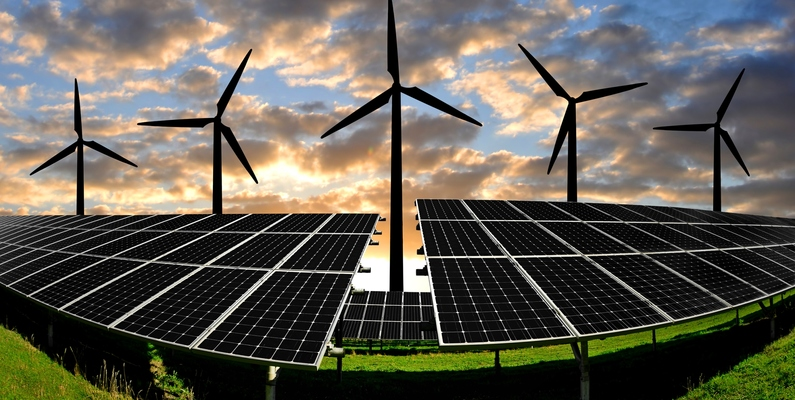

In [ ]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read the dataset
df=pd.read_csv("/content/intermittent-renewables-production-france.csv")
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Hour  59806 non-null  object        
 1   Date           59806 non-null  datetime64[ns]
 2   StartHour      59806 non-null  object        
 3   EndHour        59806 non-null  object        
 4   Source         59806 non-null  object        
 5   Production     59804 non-null  float64       
 6   dayOfYear      59806 non-null  int64         
 7   dayName        59806 non-null  object        
 8   monthName      59806 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 4.1+ MB


#preprocessing and visualization

In [ ]:
df.isna().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       0
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [ ]:
df=df.set_index('Date')
df=df.drop(['Date and Hour','StartHour','EndHour','Source','dayOfYear','dayName','monthName'],axis=1)
df.head()

,Production
Date,
2020-07-22,244.0
2020-07-23,223.0
2020-07-23,2517.0
2020-07-23,658.0
2020-07-23,0.0


<Axes: title={'center': 'Production Over Hours'}, xlabel='Date', ylabel='Production'>

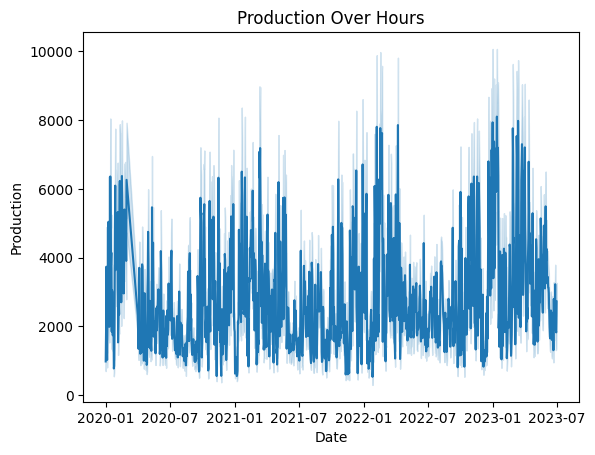

In [ ]:
plt.title("Production Over Hours")
sns.lineplot(df, x="Date", y='Production')

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have a time series data stored in the variable 'df.Production'
result = adfuller(df.Production.dropna())

# Extract the test statistic
test_statistic = result[0]

# Extract the p-value
p_value = result[1]

# Extract the critical values
critical_values = result[4]

# Print the test statistics and p-value
print("Test Statistic: ", test_statistic)
print("P-value: ", p_value)
print("Critical Values: ", critical_values)

Test Statistic:  -19.86730790851778
P-value:  0.0
Critical Values:  {'1%': -3.430459461878252, '5%': -2.8615883800760167, '10%': -2.5667957510841113}


As we see that p_value in hours is 0.0 so we have to split it into days and months

In [ ]:
# Assuming your DataFrame has a datetime index and you want to resample to Daily frequency
df = df.resample('D').mean()  # Resample to Daily frequency and sum the values

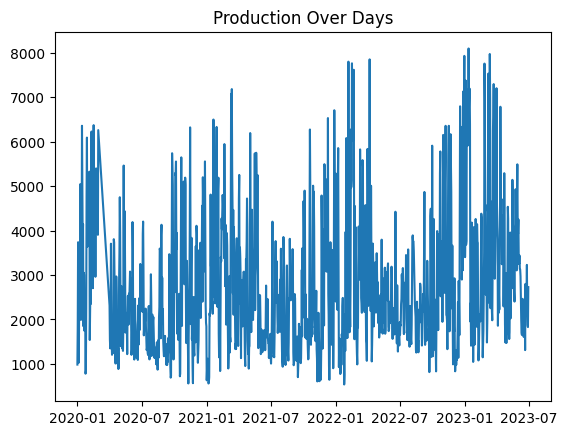

In [ ]:
plt.title("Production Over Days")
plt.plot(df.Production.dropna())

In [ ]:
# Assuming your DataFrame has a datetime index and you want to resample to monthly frequency
df_month = df.resample('M').mean()  # Resample to monthly frequency and sum the values

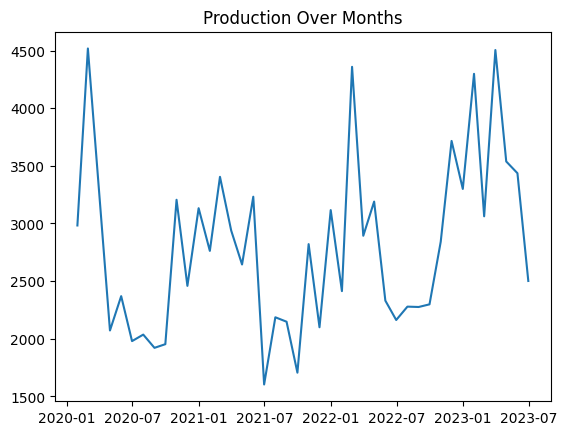

In [ ]:
plt.title("Production Over Months")
plt.plot(df_month.Production.dropna())

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have a time series data stored in the variable 'df_month.Production'
result = adfuller(df_month.Production.dropna())

# Extract the test statistic
test_statistic = result[0]

# Extract the p-value
p_value = result[1]

# Extract the critical values
critical_values = result[4]

# Print the test statistics and p-value
print("Test Statistic: ", test_statistic)
print("P-value: ", p_value)
print("Critical Values: ", critical_values)

Test Statistic:  -3.4650034834501633
P-value:  0.0089327042790281
Critical Values:  {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


As we see that p_value is  0.0089327042790281 which is lower than the threshold 0.05

In [ ]:
#Data must be 1-dimensional.
from scipy import stats
df_month.Production, lmbda = stats.boxcox(df_month.Production)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming you have a time series data stored in the variable 'df_month.Production'
result = adfuller(df_month.Production.dropna())

# Extract the test statistic
test_statistic = result[0]

# Extract the p-value
p_value = result[1]

# Extract the critical values
critical_values = result[4]

# Print the test statistics and p-value
print("Test Statistic: ", test_statistic)
print("P-value: ", p_value)
print("Critical Values: ", critical_values)

Test Statistic:  -3.767064568566401
P-value:  0.0032628456522653614
Critical Values:  {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}


 As we see that p_value after Box-Cox Transformation is 0.0032628456522653614 whis is lower than 0.0089327042790281 and the threshold 0.05 so this better than before

In [ ]:
# to interpolate the missing values
df_month=df_month.interpolate(method ='linear', limit_direction ='forward')


In [ ]:
train_size = int(len(df_month) * 0.8)
train_data, test_data = df_month.iloc[:train_size], df_month.iloc[train_size-1:]

## Applying Arima model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['Production'], order=(1, 0, 1))
fitted_model = model.fit()

In [ ]:
predictions = fitted_model.predict(start=test_data.index[0], end=test_data.index[-1])

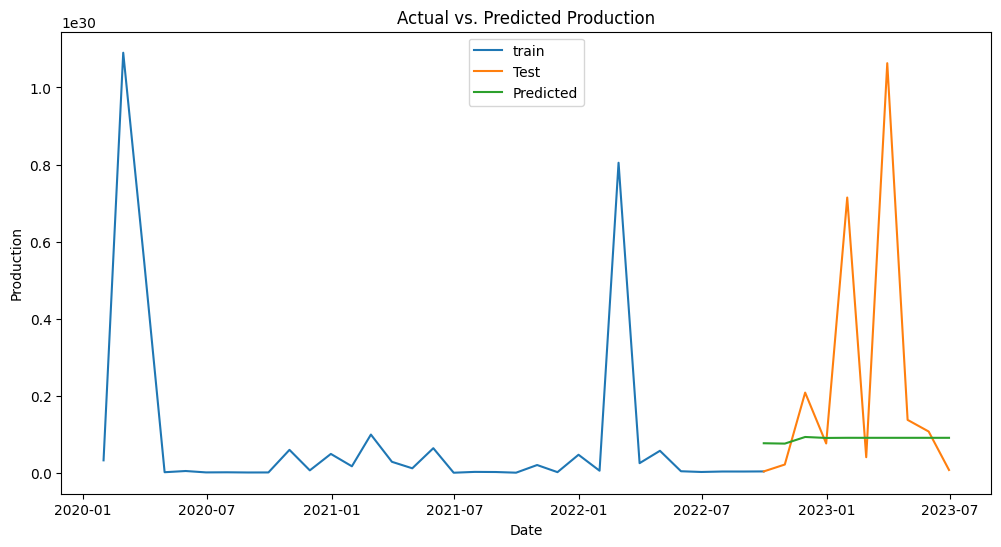

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Production'], label='train')
plt.plot(test_data.index, test_data['Production'], label='Test')
plt.plot(predictions.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Actual vs. Predicted Production')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


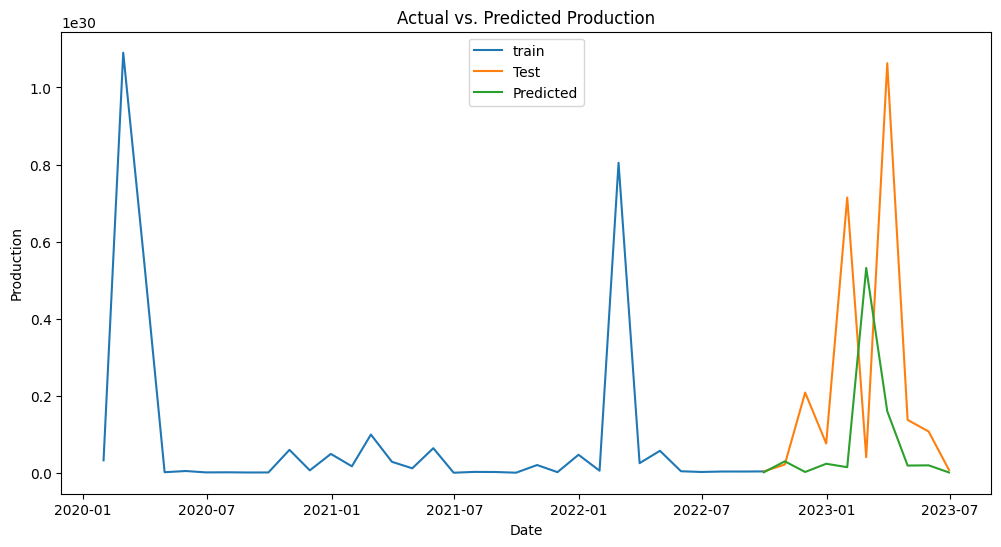

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMAX model
model = SARIMAX(train_data['Production'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))

# Fit the model to the training data
fitted_model = model.fit()

# Generate predictions on the test set
predictions = fitted_model.predict(start=test_data.index[0], end=test_data.index[-1])

# Visualize the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Production'], label='train')
plt.plot(test_data.index, test_data['Production'], label='Test')
plt.plot(predictions.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Actual vs. Predicted Production')
plt.legend()
plt.show()